In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('Qwen1.5-1.8B-Chat/results.csv')
df

,task,score,model,method
0,2wikimqa,27.48,Qwen1.5-1.8B-Chat,baseline
1,dureader,19.37,Qwen1.5-1.8B-Chat,baseline
2,gov_report,18.93,Qwen1.5-1.8B-Chat,baseline
3,hotpotqa,29.91,Qwen1.5-1.8B-Chat,baseline
4,lcc,45.08,Qwen1.5-1.8B-Chat,baseline
...,...,...,...,...
552,repobench-p,42.23,Qwen1.5-1.8B-Chat,StreamingQuant_4_256
553,samsum,27.04,Qwen1.5-1.8B-Chat,StreamingQuant_4_256
554,trec,45.00,Qwen1.5-1.8B-Chat,StreamingQuant_4_256
555,triviaqa,73.06,Qwen1.5-1.8B-Chat,StreamingQuant_4_256


In [9]:
df = pd.read_csv('Qwen1.5-1.8B-Chat/results.csv')
df = pd.concat([df[df['method'].str.contains('_2_128')], df[df['method'] == 'baseline']], axis=0)
df['method'] = df['method'].str.replace('_2_128', '')
df

,task,score,model,method
21,2wikimqa,24.40,Qwen1.5-1.8B-Chat,KiVi
22,dureader,14.28,Qwen1.5-1.8B-Chat,KiVi
23,gov_report,15.45,Qwen1.5-1.8B-Chat,KiVi
24,hotpotqa,24.36,Qwen1.5-1.8B-Chat,KiVi
25,lcc,33.69,Qwen1.5-1.8B-Chat,KiVi
...,...,...,...,...
16,repobench-p,42.73,Qwen1.5-1.8B-Chat,baseline
17,samsum,27.41,Qwen1.5-1.8B-Chat,baseline
18,trec,45.00,Qwen1.5-1.8B-Chat,baseline
19,triviaqa,72.43,Qwen1.5-1.8B-Chat,baseline


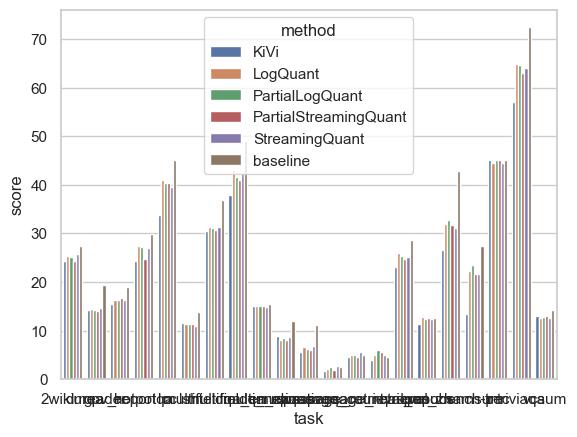

In [10]:
sns.set_theme(style="whitegrid")
sns.barplot(x='task', y='score', hue='method', data=df)
plt.show()

In [19]:
categories = {
    "Single-Document QA": ["narrativeqa", "qasper", "multifieldqa_en", "multifieldqa_zh"],
    "Multi-Document QA": ["hotpotqa", "2wikimqa", "musique", "dureader"],
    "Summarization": ["gov_report", "qmsum", "multi_news", "vcsum"],
    "Few-shot Learning": ["trec", "triviaqa", "samsum", "lsht"],
    "Synthetic Tasks": ["passage_count", "passage_retrieval_en", "passage_retrieval_zh"],
    "Code Completion": ["lcc", "repobench-p"]
}

tasks = 0
for category, task_list in categories.items():
    tasks += len(task_list)
    print(f"{category}: {len(task_list)} tasks")
print(f"Total: {tasks} tasks")

Single-Document QA: 4 tasks
Multi-Document QA: 4 tasks
Summarization: 4 tasks
Few-shot Learning: 4 tasks
Synthetic Tasks: 3 tasks
Code Completion: 2 tasks
Total: 21 tasks


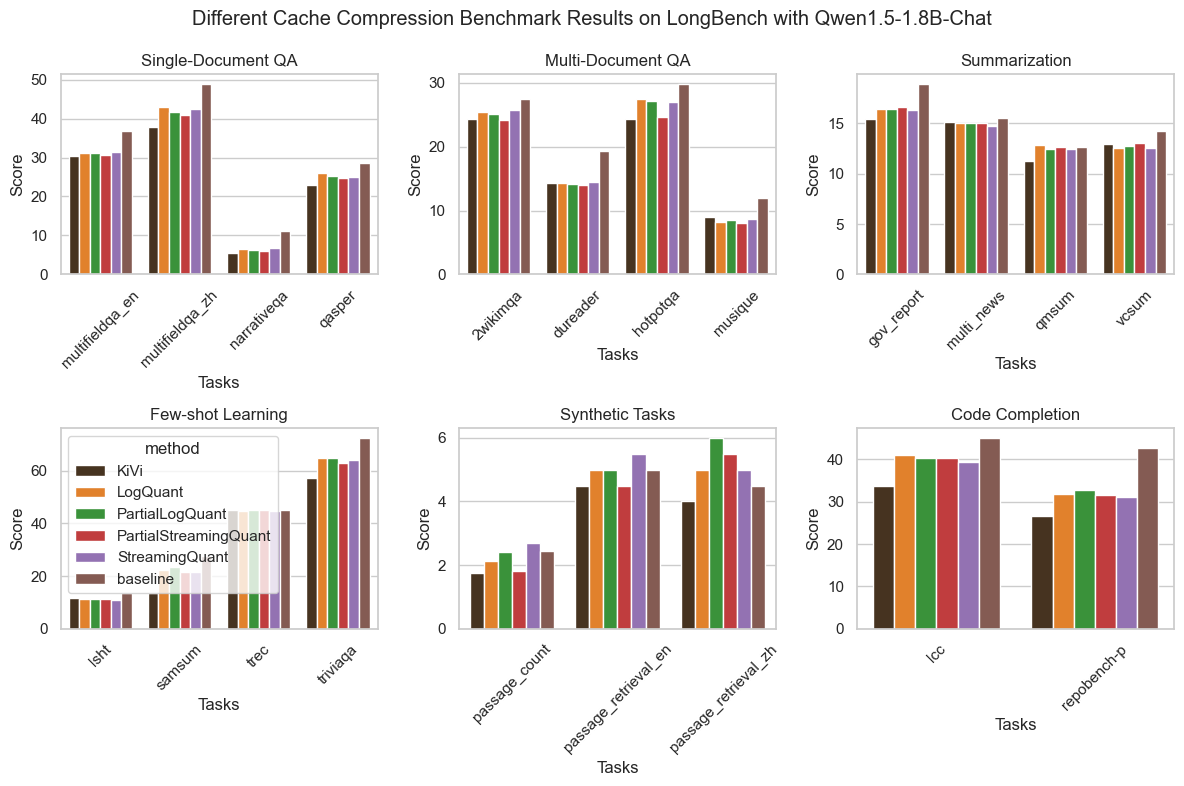

In [49]:
sns.set_theme(style="whitegrid")
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Different Cache Compression Benchmark Results on LongBench with Qwen1.5-1.8B-Chat')
#set color palette by tab10, but turn KiVi into dark color, the rest into light color
colors = sns.color_palette("tab10")
colors[0] = (0.3, 0.2, 0.1)
sns.set_palette(colors)
for i, (category, task_list) in enumerate(categories.items()):
    ax = axs[i // 3, i % 3]
    ax.set_title(category)
    sns.barplot(x='task', y='score', hue='method', data=df[df['task'].isin(task_list)], ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='center')
    ax.set_ylabel('Score')
    ax.set_xlabel('Tasks')
    if i != 3:
        ax.get_legend().remove()

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig('Qwen1.5-1.8B-Chat/results_tasks.png', dpi=600)
plt.show()


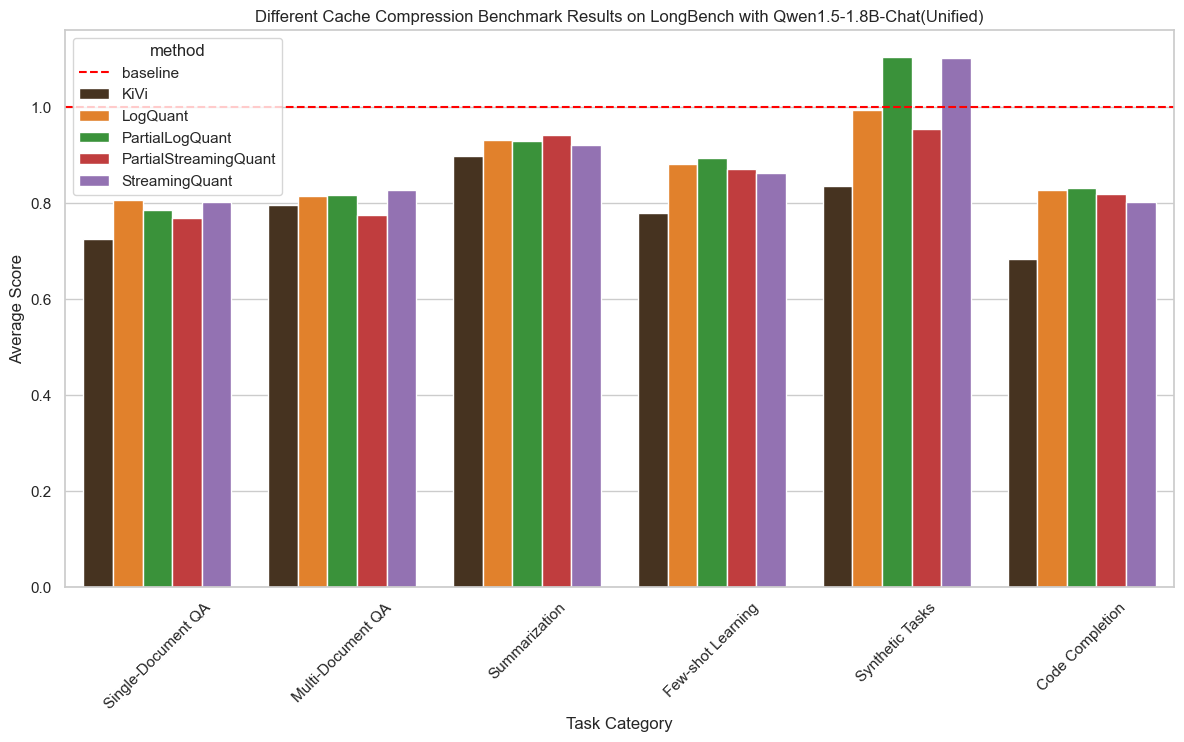

In [51]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.set_palette(colors)
fig.suptitle('Different Cache Compression Benchmark Results on LongBench with Qwen1.5-1.8B-Chat(Unified)')
df_task_category = None
for i, (category, task_list) in enumerate(categories.items()):
    df_tmp = df[df['task'].isin(task_list)]
    tasks_tmp = df_tmp['task'].unique()
    for task in tasks_tmp:
        baseline_score = df_tmp[(df_tmp['task'] == task) & (df_tmp['method'] == 'baseline')]['score'].values[0]
        for method in df_tmp['method'].unique():
            df_tmp.loc[(df_tmp['task'] == task) & (df_tmp['method'] == method), 'score'] /= baseline_score
    df_tmp_avg = df_tmp[['score', 'method']].groupby('method').mean().reset_index()
    df_tmp_avg['task'] = category
    if df_task_category is None:
        df_task_category = df_tmp_avg
    else:
        df_task_category = pd.concat([df_task_category, df_tmp_avg], axis=0, ignore_index=True)

df_task_category = df_task_category[df_task_category['method'] != 'baseline']
#draw the baseline at y=1
plt.axhline(y=1, color='red', linestyle='--', label='baseline')
sns.barplot(x='task', y='score', hue='method', data=df_task_category)
plt.ylabel('Average Score')
plt.xlabel('Task Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.title('Different Cache Compression Benchmark Results on LongBench with Qwen1.5-1.8B-Chat(Unified)')
plt.savefig('Qwen1.5-1.8B-Chat/results_tasks_unified.png', dpi=600)